In [12]:
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

Text(0.5, 1.0, 'NLfastMean\n RMSE : 7.517132328380471\n PSNR : 26.95254335957135\n SSIM : 0.7196308781782')

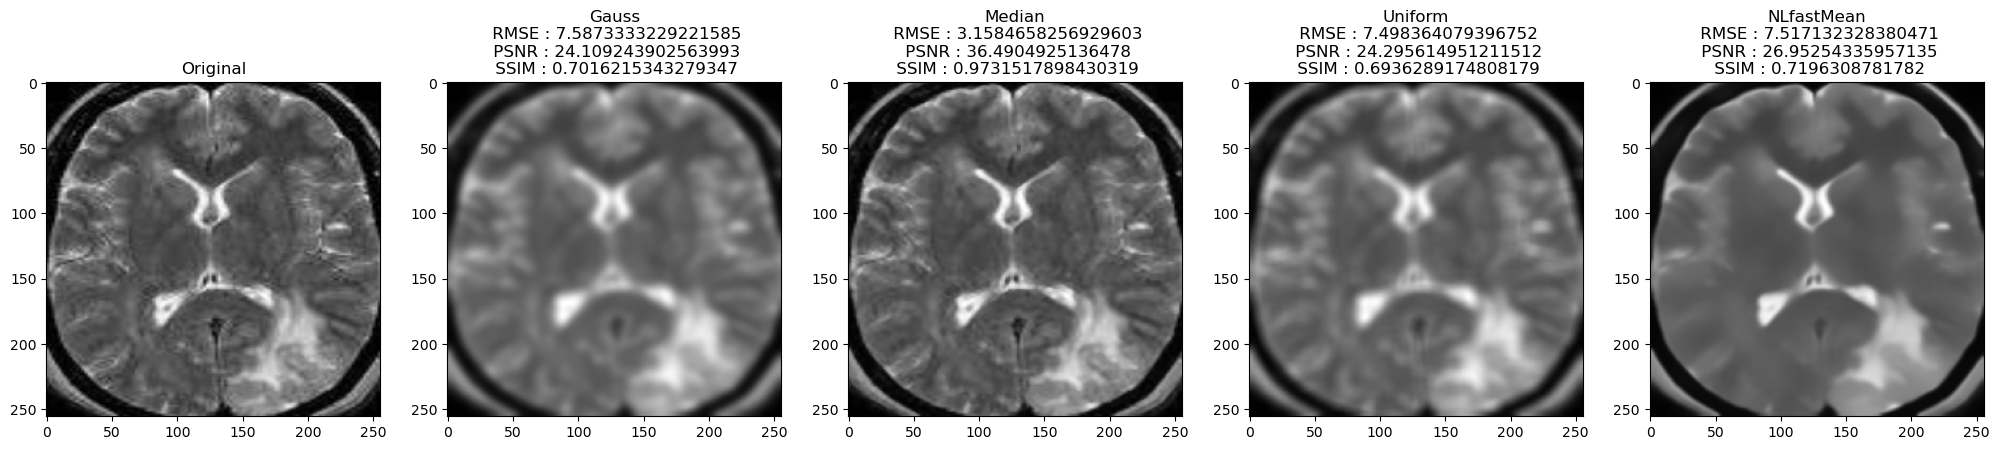

In [5]:
from pickle import TRUE
from turtle import title
from skimage import io, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import cv2
import math
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as PSNR
def RMSE(imageA, imageB):
    diffrnce = np.subtract(imageA, imageB)
    sqre_err = np.square(diffrnce)
    rslt_meansqre_err = sqre_err.mean()
    root_meansqre_err = math.sqrt(rslt_meansqre_err)
    return root_meansqre_err

img1 = cv2.imread("Im1.jpg", 0)
original=cv2.imread("Im1.jpg", 0)

uniform_filtered_img1 = ndimage.uniform_filter(img1, size=9)
blurred_img1 = ndimage.gaussian_filter(img1, sigma=3)  
median_img1 = ndimage.median_filter(img1, 3)
dst1 = cv2.fastNlMeansDenoising(img1, h=31, templateWindowSize=7)
RMSE_uniform=RMSE(original, uniform_filtered_img1)
RMSE_gauss=RMSE(original, blurred_img1)
RMSE_median=RMSE(original, median_img1)
RMSE_dst1=RMSE(original, dst1)

ssim_gauss1=ssim(original,blurred_img1)
ssim_med1=ssim(original,median_img1)
ssim_uni1=ssim(original,uniform_filtered_img1)
ssim_dst1=ssim(original,dst1)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(25)

fig.add_subplot(2,5,1)
plt.imshow(img1, cmap='gray')
plt.title('Original')

fig.add_subplot(2,5,2)
plt.imshow(blurred_img1, cmap='gray')
plt.title("Gauss\n RMSE : {}\n PSNR : {}\n SSIM : {}".format(RMSE_gauss,PSNR(original,blurred_img1),ssim_gauss1))
fig.add_subplot(2,5,3)
plt.imshow(median_img1, cmap='gray')
plt.title("Median\n RMSE : {}\n PSNR : {}\n SSIM : {}".format(RMSE_median,PSNR(original,median_img1),ssim_med1))
fig.add_subplot(2,5,4)
plt.imshow(uniform_filtered_img1, cmap='gray')
plt.title("Uniform\n RMSE : {}\n PSNR : {}\n SSIM : {}".format(RMSE_uniform,PSNR(original,uniform_filtered_img1),ssim_uni1))
fig.add_subplot(2,5,5)
plt.imshow(dst1, cmap='gray')
plt.title("NLfastMean\n RMSE : {}\n PSNR : {}\n SSIM : {}".format(RMSE_dst1,PSNR(original,dst1),ssim_dst1))